In [4]:
import project_path
from src.data import data_loader
def reload():
    import importlib
    importlib.reload(data_loader)


reload() # Reload in case module has been updated

ships = data_loader.load_ship_data()

X = ships.images
y = ships.labels

Loading ship data from path: C:\Users\victo\Aarhus universitet\Test - Dokumenter\Elektronik\Noter Elektronik\Elektronik 6. semester\ITMAL\ITMAL - Exercises\Aflevering4\src\data\../../data/raw/shipsnet.json
Ship data loaded


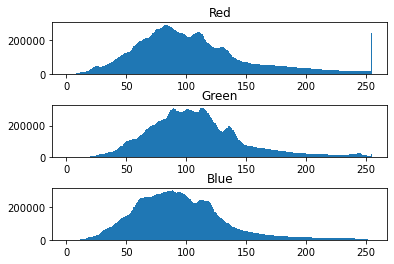

Spread of R value: 48.42939179625947
Mean of R value: 105.038366171875
Median of R value: 97.0
Spread of G value: 40.01040581629869
Mean of G value: 108.188383359375
Median of G value: 104.0
Spread of B value: 38.64448976460079
Mean of B value: 94.955844140625
Median of B value: 91.0


In [5]:
#Normalfordeling, spredning, middel- og median værdi
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


f, axarr = plt.subplots(3,1)
plt.subplots_adjust(hspace=0.6)
red = X[:,:,:,0]
green = X[:,:,:,1]
blue = X[:,:,:,2]

axarr[0].hist(red.ravel(), 255)
axarr[0].set_title("Red")
axarr[1].hist(green.ravel(), 255)
axarr[1].set_title("Green")
axarr[2].hist(blue.ravel(), 255)
axarr[2].set_title("Blue")

#plt.hist(X.ravel(), 30)
#plt.hist(red.ravel(), 30)
plt.show()
print(f"Spread of R value: {np.std(red)}")
print(f"Mean of R value: {np.mean(red)}")
print(f"Median of R value: {np.median(red)}")

print(f"Spread of G value: {np.std(green)}")
print(f"Mean of G value: {np.mean(green)}")
print(f"Median of G value: {np.median(green)}")

print(f"Spread of B value: {np.std(blue)}")
print(f"Mean of B value: {np.mean(blue)}")
print(f"Median of B value: {np.median(blue)}")


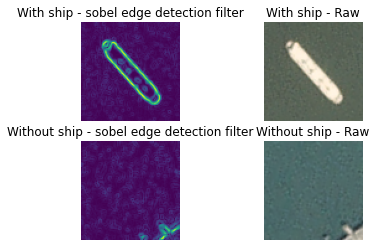

In [3]:
#Edge detection
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
#With ship
index_with_ship = np.where(y == 1)[0][0]
image_with_ship = X[index_with_ship]
image_with_ship_gray = rgb2gray(image_with_ship) # Needs to be grayscale to do edge detection
edges_with_ship = filters.sobel(image_with_ship_gray)
#Without ship
index_no_ship = np.where(y == 0)[0][0]
image_no_ship = X[index_no_ship]
image_no_ship_gray = rgb2gray(image_no_ship)
edges_no_ship = filters.sobel(image_no_ship_gray)

#Plot
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(edges_with_ship)
axarr[0,0].set_title("With ship - sobel edge detection filter")
axarr[0,0].axis("off")

axarr[0,1].imshow(image_with_ship)
axarr[0,1].set_title("With ship - Raw")
axarr[0,1].axis("off")

axarr[1,0].imshow(edges_no_ship)
axarr[1,0].set_title("Without ship - sobel edge detection filter")
axarr[1,0].axis("off")

axarr[1,1].imshow(image_no_ship)
axarr[1,1].set_title("Without ship - Raw")
axarr[1,1].axis("off")

plt.show()

(80, 80, 3)


(-0.5, 79.5, 79.5, -0.5)

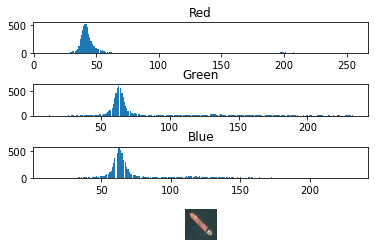

In [64]:
index = 5


f, axarr = plt.subplots(4,1)
plt.subplots_adjust(hspace=1)
image = X[index]
print(image.shape)
#Histogram
axarr[0].hist(red[index].ravel(), 255)
axarr[0].set_title("Red")
axarr[1].hist(green[index].ravel(), 255)
axarr[1].set_title("Green")
axarr[2].hist(blue[index].ravel(), 255)
axarr[2].set_title("Blue")
axarr[3].imshow(image)
axarr[3].axis("off")



Text(0.5, 1.0, 'Blue')

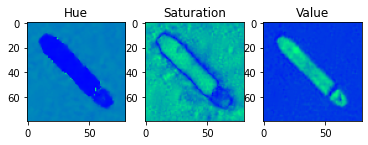

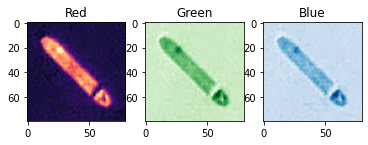

In [62]:
from skimage.color import rgb2hsv

index = 5

image = X[index]
image_hsv = rgb2hsv(image)

hue_img = image_hsv[:, :, 0]
saturation_img = image_hsv[:, :, 1]
value_img = image_hsv[:, :, 2]

red_img = image[:, :, 0]
green_img = image[:, :, 1]
blue_img = image[:, :, 2]

#Image with HSV seperated
f, axarr = plt.subplots(1,3)
axarr[0].imshow(hue_img, cmap=plt.get_cmap('winter'))
axarr[0].set_title("Hue")
axarr[1].imshow(saturation_img, cmap=plt.get_cmap('winter'))
axarr[1].set_title("Saturation")
axarr[2].imshow(value_img, cmap=plt.get_cmap('winter'))
axarr[2].set_title("Value")

#Image with RGB seperated
f, axarr = plt.subplots(1,3)
axarr[0].imshow(red_img, cmap=plt.get_cmap('magma'))
axarr[0].set_title("Red")
axarr[1].imshow(green_img, cmap=plt.get_cmap('Greens'))
axarr[1].set_title("Green")
axarr[2].imshow(blue_img, cmap=plt.get_cmap('Blues'))
axarr[2].set_title("Blue")